# Курсовая работа. Блок ML
<br>


<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей, 
3. Построение моделей для прогнозирования оттока на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей.


<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей](#2.-Исследование-зависимостей)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [5]:
# библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [6]:
# загрузка df
df = pd.read_csv('data/telecom_users.csv')

In [7]:
df.head(3)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes


In [150]:
# проверка кол-во строк и столбцов
shape = df.shape

# проверка дубликатов
duplicated = df.duplicated(subset='customerID').sum()

# проверка пустых строк
isnull = df.isnull().sum()

print(f'Строк: {shape[0]}\nСтолбцов: {shape[1]}\nДубликатов (customerID): {duplicated}\n\nПустые строки:\n{isnull}')

Строк: 5986
Столбцов: 22
Дубликатов (customerID): 0

Пустые строки:
Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
Unnamed: 0          5986 non-null int64
customerID          5986 non-null object
gender              5986 non-null object
SeniorCitizen       5986 non-null int64
Partner             5986 non-null object
Dependents          5986 non-null object
tenure              5986 non-null int64
PhoneService        5986 non-null object
MultipleLines       5986 non-null object
InternetService     5986 non-null object
OnlineSecurity      5986 non-null object
OnlineBackup        5986 non-null object
DeviceProtection    5986 non-null object
TechSupport         5986 non-null object
StreamingTV         5986 non-null object
StreamingMovies     5986 non-null object
Contract            5986 non-null object
PaperlessBilling    5986 non-null object
PaymentMethod       5986 non-null object
MonthlyCharges      5986 non-null float64
TotalCharges        5986 non-null object
Churn               5986 non-null 

# 2. Исследование зависимостей

In [8]:
# в столбце TotalCharges имеются значения с пробелами
# преобразуем в float, а пустые назначаем нулями
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x) if len(x.replace(' ', '')) > 0 else 0.0)
df.loc[:, 'TotalCharges'][df.TotalCharges == 0] = df['MonthlyCharges']

# узнаем долю клиентов, медиану месячного размера оплаты и медиану общей суммы мужского и женского пола
df_group = df.groupby('gender').agg({'customerID': lambda x: f'{round((x.count()*100)/df.shape[0], 0)} %', 'MonthlyCharges': 'median', 'TotalCharges': 'median'})
df_group.columns = ['customerID', 'median monthly charges', 'median total charges']
df_group

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,customerID,median monthly charges,median total charges
gender,,,
Female,49.0 %,70.675,1389.05
Male,51.0 %,70.200,1415.50


In [153]:
# узнаем долю клиетов оттока
df.groupby('Churn').agg({'customerID': lambda x: f'{round((x.count()*100)/df.shape[0], 0)} %'})

,customerID
Churn,
No,73.0 %
Yes,27.0 %


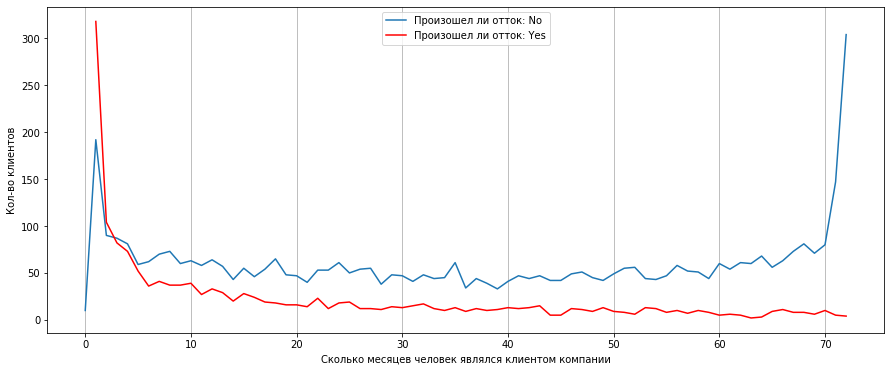

In [10]:
# визуализируем отток клиентов и оставшихся клиентов
df_group_tenure = df.groupby(['tenure', 'Churn'], as_index=False).agg({'customerID': 'count'})

X_no = df_group_tenure['tenure'][df_group_tenure.Churn == 'No']
y_no = df_group_tenure['customerID'][df_group_tenure.Churn == 'No']
X_yes = df_group_tenure['tenure'][df_group_tenure.Churn == 'Yes']
y_yes = df_group_tenure['customerID'][df_group_tenure.Churn == 'Yes']

plt.figure(figsize=(15,6))
plt.plot(X_no, y_no, label='Произошел ли отток: No')
plt.plot(X_yes, y_yes, c='r', label='Произошел ли отток: Yes')

plt.legend()
plt.grid(axis='x')
plt.ylabel('Кол-во клиентов')
plt.xlabel('Сколько месяцев человек являлся клиентом компании')
plt.show()

In [195]:
# какое кол-во клиентов с каким типом контракта являются клиентами, а какое кол-во отток
df.groupby(['Contract', 'Churn']).agg({'customerID': 'count'})

customerID
Contract       Churn            
Month-to-month No           1871
               Yes          1398
One year       No           1128
               Yes           148
Two year       No           1400
               Yes            41

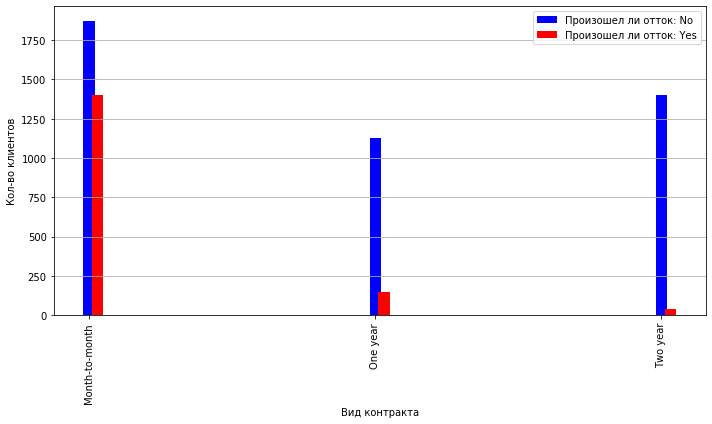

In [193]:
# Строим график

# группируем в переменную
df_group_contract = df.groupby(['Contract', 'Churn'], as_index=False).agg({'customerID': 'count'})
# назначаем цвета
colors = ['b', 'r']
# генерируем названия по Х
labels_x = [name_c for name_c in df_group_contract.drop_duplicates('Contract')['Contract']]
# название legend
labels = ['No', 'Yes']

# формируем У
y = list()
for n, contract in enumerate(df_group_contract.drop_duplicates('Contract')['Contract']):
    y.append(df_group_contract['customerID'][df_group_contract.Contract == contract].values[0])
    y.append(df_group_contract['customerID'][df_group_contract.Contract == contract].values[1])
y = np.array(y).reshape((3,2)).T
# назначаем Х
x = np.arange(len(labels_x))
# ширина полоски
width = 0.04

fig, ax = plt.subplots()

step_width = 0.001
step_height = 0
for number in range(0, 2, 1):
    y_y = y[number]
    rects = ax.bar((x + step_width), y_y, width, align='center', label=f'Произошел ли отток: {labels[number]}', color=colors[number])
    step_width += 0.03
    step_height += 0.07

ax.set_ylabel('Кол-во клиентов')
fig.set_figwidth(10)
fig.set_figheight(6)
plt.xticks(x, rotation='vertical')
plt.xlabel('Вид контракта')
ax.set_xticklabels(labels_x)
plt.grid(axis='y')
ax.legend()

fig.tight_layout()

plt.show()

In [302]:
# находим разницу оттока по видам контракта
name_contracts = df_group_contract.drop_duplicates('Contract', keep='first')['Contract'].values
for name_column in name_contracts:
    a = df_group_contract[(df_group_contract.Contract == name_column) & \
                        (df_group_contract.Churn == 'No')]['customerID'].values[0]
    b = df_group_contract[(df_group_contract.Contract == name_column) & \
                                (df_group_contract.Churn == 'Yes')]['customerID'].values[0]
    value_residual = a - b
    print(name_column, value_residual)

Month-to-month 473
One year 980
Two year 1359


In [351]:
# находим минимальный, максимальный, средний от месячного размера оплаты и общей суммы, которую клиент заплатил за услуги за все время
df.groupby('Churn').agg({'tenure': ['min', 'max', 'mean'],'MonthlyCharges': ['min', 'max', 'mean'], 'TotalCharges': ['min', 'max', 'mean']})

tenure                MonthlyCharges                    TotalCharges  \
         min max       mean            min     max       mean          min   
Churn                                                                        
No         0  72  37.599682          18.25  118.75  61.424506         0.00   
Yes        1  72  18.246377          18.85  118.35  74.164871        18.85   

                             
           max         mean  
Churn                        
No     8672.45  2562.456513  
Yes    8684.80  1550.701985

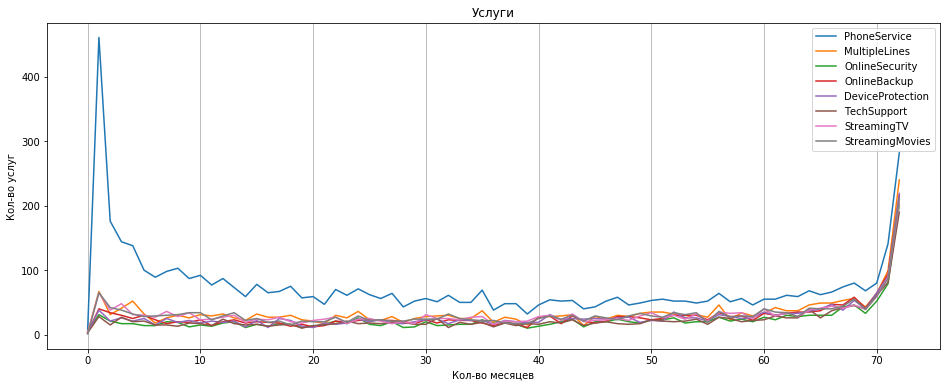

In [239]:
# выводим кол-во услуг в зависимости от кол-во месяцев человека являющийся клиентом компании
df_services = df[['tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]

plt.figure(figsize=(16,6))
for name_column in df_services.drop(columns='tenure').columns:
    df_services_group = df_services[df_services[name_column] == 'Yes'][
                                        ['tenure', name_column]
                                        ].groupby('tenure', as_index=False).agg('count')
    x = df_services_group['tenure']
    y = df_services_group[name_column]
    plt.plot(x, y, label=name_column,)
plt.grid(axis='x')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Кол-во услуг')
plt.title('Услуги')
plt.legend()
plt.show()

In [9]:
# Готовим df
df_main = df.copy()
# gender: 0 = Male, 1 = Famale
df_main.gender = df_main.gender.apply(lambda x: 0 if x == 'Male' else 1)
# Partner: 0 = Yes, 1 = No
df_main.Partner = df_main.Partner.apply(lambda x: 0 if x == 'Yes' else 1)
# Dependents: 0 = Yes, 1 = No
df_main.Dependents = df_main.Dependents.apply(lambda x: 0 if x == 'Yes' else 1)
# PhoneService: 0 = Yes, 1 = No
df_main.PhoneService = df_main.PhoneService.apply(lambda x: 0 if x == 'Yes' else 1)
# MultipleLines: 0 = Yes, 1 = No, 2 = No phone service
df_main.MultipleLines = df_main.MultipleLines.apply(lambda x: 0 if x == 'Yes' else 1 if x == 'No' else 2)
# InternetService: 0 = DSL, 1 = Fiber optic, 2 = No
df_main.InternetService = df_main.InternetService.apply(lambda x: 0 if x == 'DSL' else 1 if x == 'Fiber optic' else 2)
# OnlineSecurity: 0 = Yes, 1 = No, 2 = No phone service
df_main.OnlineSecurity = df_main.OnlineSecurity.apply(lambda x: 0 if x == 'Yes' else 1 if x == 'No' else 2)
# OnlineBackup: 0 = Yes, 1 = No, 2 = No phone service
df_main.OnlineBackup = df_main.OnlineBackup.apply(lambda x: 0 if x == 'Yes' else 1 if x == 'No' else 2)
# DeviceProtection: 0 = Yes, 1 = No, 2 = No phone service
df_main.DeviceProtection = df_main.DeviceProtection.apply(lambda x: 0 if x == 'Yes' else 1 if x == 'No' else 2)
# TechSupport: 0 = Yes, 1 = No, 2 = No phone service
df_main.TechSupport = df_main.TechSupport.apply(lambda x: 0 if x == 'Yes' else 1 if x == 'No' else 2)
# StreamingTV: 0 = Yes, 1 = No, 2 = No phone service
df_main.StreamingTV = df_main.StreamingTV.apply(lambda x: 0 if x == 'Yes' else 1 if x == 'No' else 2)
# StreamingMovies: 0 = Yes, 1 = No, 2 = No phone service
df_main.StreamingMovies = df_main.StreamingMovies.apply(lambda x: 0 if x == 'Yes' else 1 if x == 'No' else 2)
# Contract: 0 = Month-to-month, 1 = One year, 2 = Two year
df_main.Contract = df_main.Contract.apply(lambda x: 0 if x == 'Month-to-month' else 1 if x == 'One year' else 2)
# PaperlessBilling: 0 = Yes, 1 = No
df_main.PaperlessBilling = df_main.PaperlessBilling.apply(lambda x: 0 if x == 'Yes' else 1)
# PaymentMethod: 0 = Electronic check, 1 = Mailed check, 2 = Bank transfer, 3 = Credit card
df_main.PaymentMethod = df_main.PaymentMethod.apply(lambda x: 0 if x == 'Electronic check' else 1 
                                                                if x == 'Mailed check' else 2 
                                                                if x == 'Bank transfer (automatic)' else 3)
# # tenure: 0 = 1-18, 1 = 19-37, 2 = 38-55, 3 = 56-72
# df_main.loc[ df_main['tenure'] <= 18, 'tenure'] = 0
# df_main.loc[(df_main['tenure'] > 18) & (df_main['tenure'] <= 37), 'tenure'] = 1
# df_main.loc[(df_main['tenure'] > 37) & (df_main['tenure'] <= 55), 'tenure'] = 2
# df_main.loc[df_main['tenure'] > 55, 'tenure'] = 3

# # MonthlyCharges: 0 = 18-46, 1 = 47-74, 2 = 75-102, 3 = 103-118
# df_main.loc[ df_main['MonthlyCharges'] <= 46, 'MonthlyCharges'] = 0
# df_main.loc[(df_main['MonthlyCharges'] > 46) & (df_main['MonthlyCharges'] <= 74), 'MonthlyCharges'] = 1
# df_main.loc[(df_main['MonthlyCharges'] > 74) & (df_main['MonthlyCharges'] <= 102), 'MonthlyCharges'] = 2
# df_main.loc[df_main['MonthlyCharges'] > 102, 'MonthlyCharges'] = 3
# df_main['MonthlyCharges'] = df_main['MonthlyCharges'].astype(int)

# # TotalCharges: 0 = 0-2170, 1 = 2171-4342, 2 = 4343-6512, 3 = 6513-8685
# df_main.loc[ df_main['TotalCharges'] <= 2170, 'TotalCharges'] = 0
# df_main.loc[(df_main['TotalCharges'] > 2170) & (df_main['TotalCharges'] <= 4342), 'TotalCharges'] = 1
# df_main.loc[(df_main['TotalCharges'] > 4342) & (df_main['TotalCharges'] <= 6512), 'TotalCharges'] = 2
# df_main.loc[df_main['TotalCharges'] > 6512, 'TotalCharges'] = 3
# df_main['TotalCharges'] = df_main['TotalCharges'].astype(int)

# Churn: 0 = Yes, 1 = No
df_main.Churn = df_main.Churn.apply(lambda x: 0 if x == 'Yes' else 1)
# Удаляем customerID
df_main = df_main.drop('customerID', axis=1)
# переименовываем
df_main.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

(20.0, 0.0)

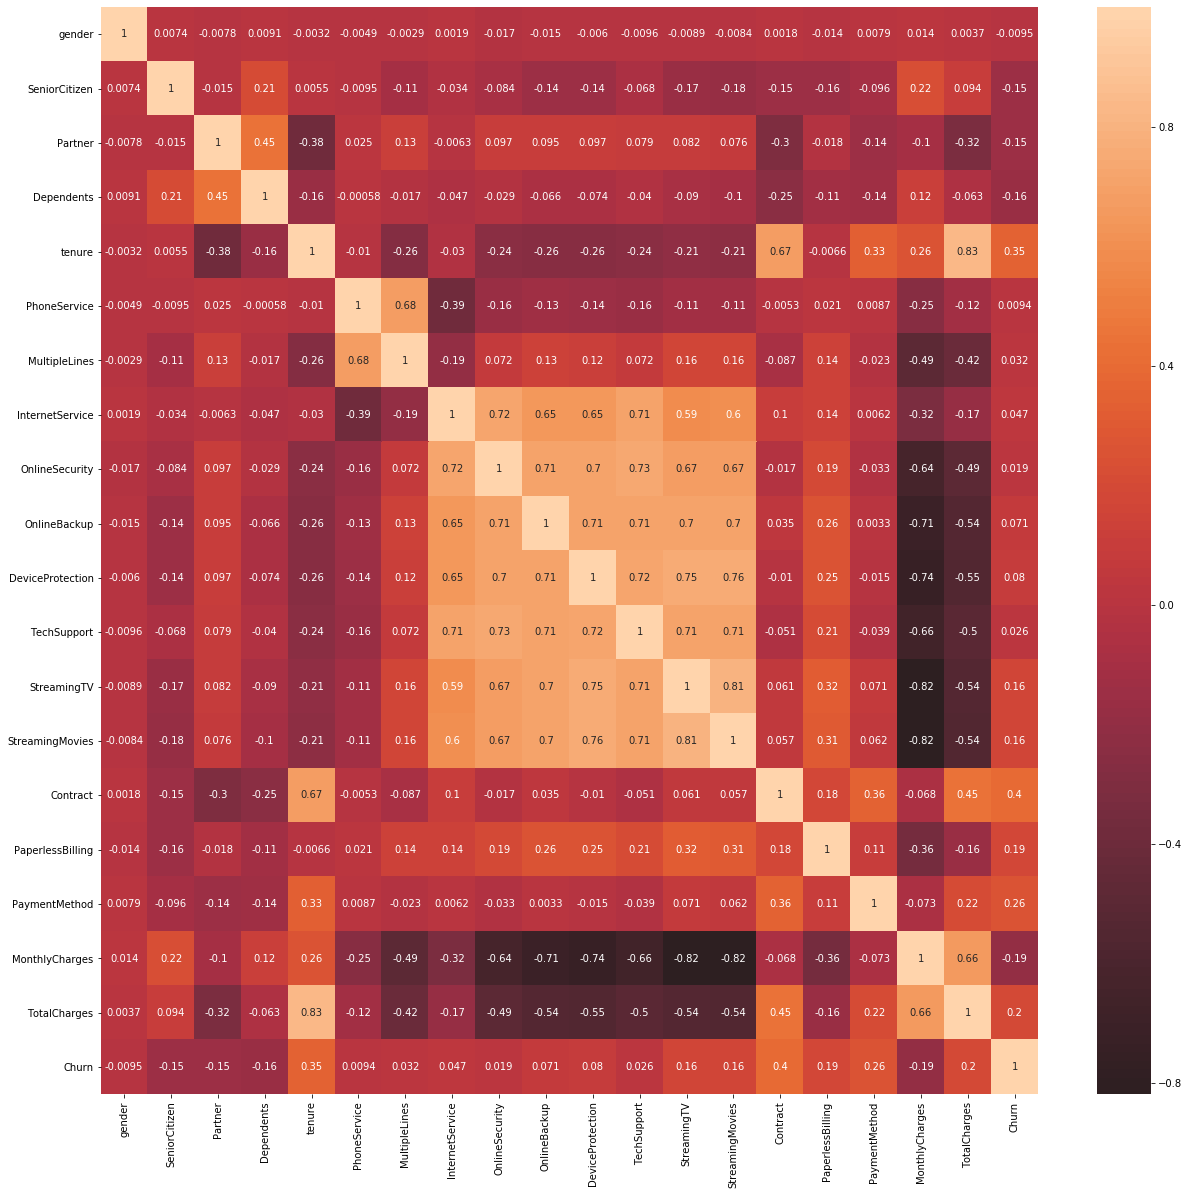

In [155]:
# оцениваем наличие связи с помощью коэффициента корреляции
plt.figure(figsize=(21,20))
ax = sns.heatmap(df_main.drop('id', axis=1).corr(), center=-1, annot=True, fmt ='.2g')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

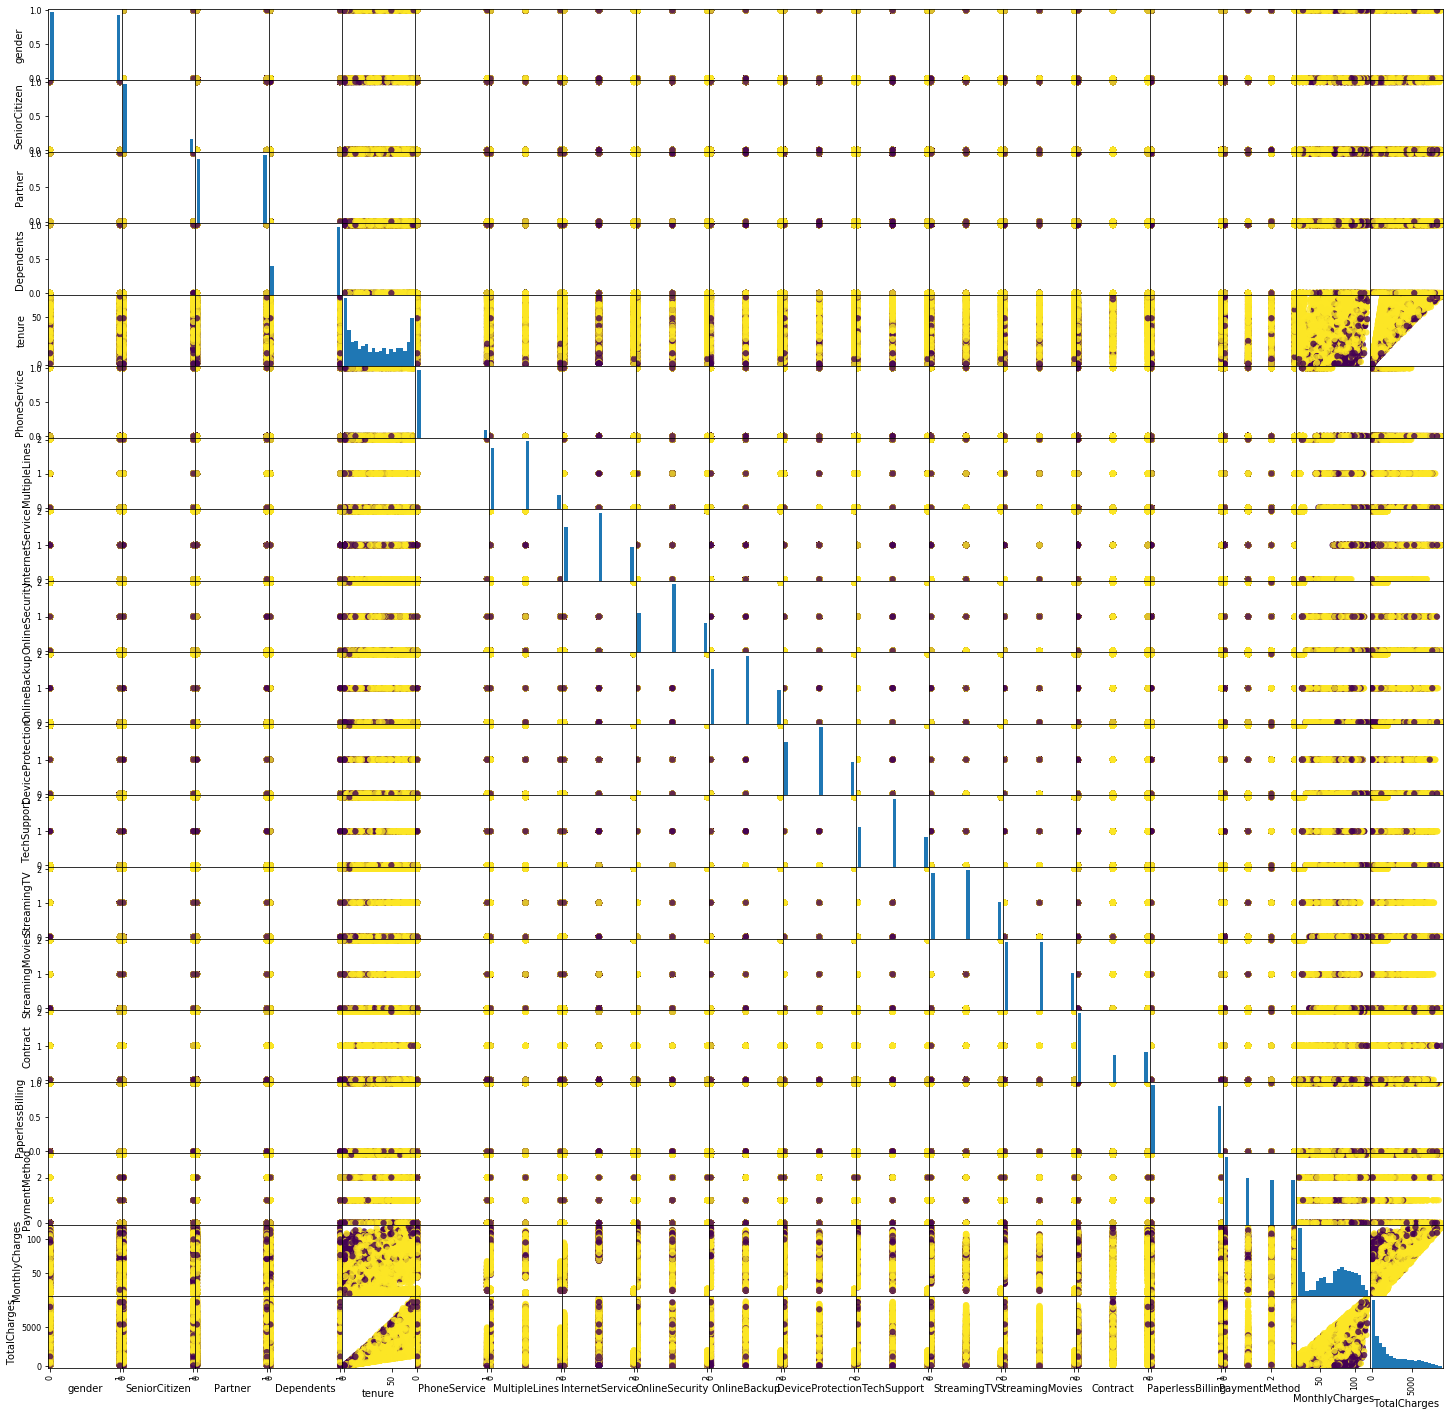

In [95]:
# выводим матрицу
features = df_main.drop(['id', 'Churn'], axis=1)
targets = df_main['Churn']

scat_mtrx = pd.plotting.scatter_matrix(features, c=targets, figsize=(25, 25), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

<br>
<br>
<br>

Чем больше компания будет заключать *Tow year* договоров, тем меньше будет оттока.
<br>
<br>
<br>


# 3. Построение моделей для прогнозирования оттока

In [42]:
# библиотеки
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold,
                                    cross_val_predict)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

roc_auc_dict = dict()

In [43]:
# разбиваем базу
X = df_main.drop(['id', 'Churn'], axis=1)
y = df_main['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17, test_size=.3)

In [11]:
X.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,72,0,0,2,2,2,2,2,2,2,2,1,3,24.10,1734.65
1,1,0,1,1,44,0,1,1,1,0,0,1,0,1,0,0,3,88.15,3973.20
2,1,1,0,1,38,0,0,1,1,1,1,1,1,1,0,0,2,74.95,2869.85


#### kNN

In [44]:
# находим метрику качества roc_auc (kNN) с лучшим кол-вом ближайших соседей
roc_auc_knn = -1
neighbor = 0
for neighbors in range(1, 50, 1):
    knn = KNeighborsClassifier(n_neighbors=neighbors).fit(X_train, y_train)
    y_pred = knn.predict_proba(X_test)
    roc_auc_value = roc_auc_score(y_test, y_pred[:, 1])
    if roc_auc_value > roc_auc_knn:
        roc_auc_knn = roc_auc_value
        neighbor = neighbors

roc_auc_dict.update({'kNN': roc_auc_knn})

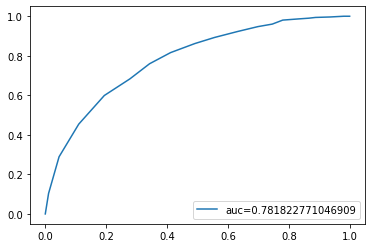

In [45]:
# выводим график
probas = KNeighborsClassifier(n_neighbors=neighbor).fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

#### GaussionNB

In [46]:
# находим метрику качества roc_auc (GaussianNB)
nb = GaussianNB().fit(X_train, y_train)
nb_pred = nb.predict_proba(X_test)
roc_auc_gnb = roc_auc_score(y_test, nb_pred[:, 1])

roc_auc_dict.update({'GaussionNB': roc_auc_gnb})

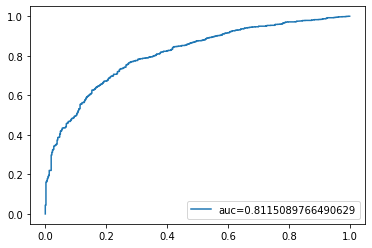

In [47]:
# выводим график
probas = GaussianNB().fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

#### DecisionTreeClassifier

In [48]:
# находим метрику качества roc_auc (DecisionTreeClassifier) с лучшей максимальной глубиной дерева 
roc_auc_dtc = -1
max_depths = 0
for max_d in range(1, 20, 1):
    dtc_model = DecisionTreeClassifier(max_depth=max_d, random_state=17).fit(X_train, y_train)
    dtc_predict = dtc_model.predict_proba(X_test)
    roc_auc_value = roc_auc_score(y_test, dtc_predict[:, 1])
    if roc_auc_value > roc_auc_dtc:
        roc_auc_dtc = roc_auc_value
        max_depths = max_d

roc_auc_dict.update({'DecisionTreeClassifier': roc_auc_dtc})

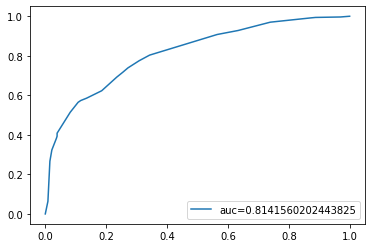

In [49]:
# выводим график
probas = DecisionTreeClassifier(max_depth=max_depths, random_state=17).fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

#### GridSearchCV

In [50]:
# находим лучшие параметры моделей.
# параметры алгоритма
knn_params = {'n_neighbors': range(1, 20, 1)} # KNeighborsClassifier
gnb_params = {} # GaussianNB
dtc_params = {'max_depth': range(1, 6), 'max_features': range(1, 10)} # DecisionTreeClassifier

# разбиваем данные для кросс-валидации по 5 блокам
skf = StratifiedKFold(n_splits=5, random_state=17)

# получаем лучшие параметры
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='roc_auc', cv=skf)
gnb_gs = GridSearchCV(GaussianNB(), gnb_params, scoring='roc_auc', cv=skf)
dtc_gs = GridSearchCV(DecisionTreeClassifier(random_state=17), dtc_params, scoring='roc_auc', cv=skf)

models = [knn_gs, gnb_gs, dtc_gs]

In [52]:
# находим метрику качества roc_auc для всех моделей с лучшими параметрами
for model in models:
    model.fit(X_train, y_train)
    model_predict = model.predict_proba(X_test)
    roc_auc_dict.update({'GridSearchCV({})'.format(str(model.estimator).split("(")[0]): roc_auc_score(y_test, model_predict[:, 1])})

#### Boosting

In [53]:
# параметр алгоритма
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)}
# получаем лучшие параметры
gbc_gs = GridSearchCV(GradientBoostingClassifier(), gbc_params, scoring='roc_auc', cv=skf)

gbc_model = gbc_gs.fit(X_train, y_train)
gbc_pred = gbc_model.predict_proba(X_test)
roc_auc_dict.update({'GridSearchCV(GradientBoostingClassifier)': roc_auc_score(y_test, gbc_pred[:, 1])})

Так как у нас есть входящие и исходящие данные и ответ должен быть бинарным (т.е. No = 1 отток не произошел, Yes = 0 отток произошел), тогда для предсказания используем модели классификации.  

# 4. Сравнение качества моделей 

In [59]:
best_value = 0
best_model = ''
for model, value in roc_auc_dict.items():
    if value > best_value:
        best_model, best_value = model, value
print(f'Лучшая модель {best_model}: ROC_AUC -> {best_value}')

Лучшая модель GridSearchCV(GradientBoostingClassifier): ROC_AUC -> 0.833679584757171



<br>
<br>
<br>



#### Для предсказание оттока клиентов телекоммуникационной компании лучше использовать ансамблирование GradientBoosting, т.к. при оценки модлей не привязываясь к конкретному порогу AUC-ROC = 0.833679584757171.